<a href="https://colab.research.google.com/github/junduk123/Machine-Learning-Task/blob/main/Task3/MaterialStrength.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
# Uncomment the line below if the libraries are not installed
!pip install scikit-learn pandas numpy matplotlib

In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
# Install necessary libraries (if not already installed)
# Uncomment the following line in Colab if needed
# !pip install scikit-learn pandas numpy matplotlib

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score



In [63]:
# Load the dataset
# Replace 'MaterialStrength.csv' with the path to your file if it's different
data = pd.read_csv('/content/drive/MyDrive/Dataset/MaterialStrength.csv')


In [64]:
# Display the first few rows of the dataset to understand its structure
print(data.head())

      x1     x2   x3     x4   x5      x6     x7   x8        x9    x10  \
0  540.0    0.0  0.0  162.0  2.5  1040.0  676.0   28  0.300000  540.0   
1  540.0    0.0  0.0  162.0  2.5  1055.0  676.0   28  0.300000  540.0   
2  332.5  142.5  0.0  228.0  0.0   932.0  594.0  270  0.685714  475.0   
3  332.5  142.5  0.0  228.0  0.0   932.0  594.0  365  0.685714  475.0   
4  198.6  132.4  0.0  192.0  0.0   978.4  825.5  360  0.966767  331.0   

        x11  x12       x13  x14  x15  target_feature  
0  1.538462    1  0.350044  YEs   NO           79.99  
1  1.560651    1  0.452416  yES  nOO           61.89  
2  1.569024    0  6.704743  yEs   NO           40.27  
3  1.569024    0  8.891596  yes  NOO           41.05  
4  1.185221    0  8.126411  YeS   no           44.30  


In [65]:
# Extract features and target variables
# Using all 'x1' to 'x15' as features and 'fitur_target' as the target variable
features = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15']
X = data[features]  # Independent variables
y = data['target_feature']   # Dependent variable (target)

In [66]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
# 1. Simple Linear Regression
# Initialize the Linear Regression model
linear_model = LinearRegression()

In [83]:
# Convert all features to numeric values (in case some columns are not numeric)
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')
y_train = pd.to_numeric(y_train, errors='coerce')
y_test = pd.to_numeric(y_test, errors='coerce')

# Fill any missing values with the mean of the respective column
# Imputation using SimpleImputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Replace 'mean' with other strategies if needed

# Fit the imputer on the training data and transform both train and test data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# If y_train or y_test have missing values, impute them as well
if y_train.isnull().any():
    y_train = imputer.fit_transform(y_train.reshape(-1, 1))  # Reshape for single feature
    y_train = y_train.ravel()  # Flatten back to original shape
if y_test.isnull().any():
    y_test = imputer.transform(y_test.reshape(-1, 1))  # Reshape for single feature
    y_test = y_test.ravel()  # Flatten back to original shape

# Check the shapes of X_train and y_train
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

# Fit the model to the training data
linear_model.fit(X_train, y_train,)

X_train shape: (824, 13)
y_train shape: (824,)


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['x14' 'x15']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['x14' 'x15']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


LinearRegression()

In [85]:
# Ensure X_test is numeric and handle missing values
# X_test = X_test.apply(pd.to_numeric, errors='coerce') # This line is causing the error. Removed
# Since X_test is already a NumPy array after imputation, we don't need to convert it again.
# Instead, we'll handle missing values directly using NumPy's nan_to_num
import numpy as np
X_test = np.nan_to_num(X_test, nan=np.nanmean(X_test)) # Replaces NaNs with the mean of each column in X_test


# Confirm that X_test has the correct shape and number of features
print("X_test shape:", X_test.shape)

# Predict on the test data using the trained linear regression model
y_pred_linear = linear_model.predict(X_test)

# Display the first few predictions for verification
print("First few predictions:", y_pred_linear[:5])

X_test shape: (206, 13)
First few predictions: [75.97085651 51.59490692 59.47817888 50.6510284   3.48881952]


In [86]:
# Calculate performance metrics for simple linear regression
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_linear)

In [87]:
# Print the results for simple linear regression
print("Simple Linear Regression Results:")
print(f"Mean Squared Error (MSE): {mse_linear}")
print(f"Root Mean Squared Error (RMSE): {rmse_linear}")
print(f"R-squared (R2): {r2_linear}")

Simple Linear Regression Results:
Mean Squared Error (MSE): 75.64933921362244
Root Mean Squared Error (RMSE): 8.697662859275614
R-squared (R2): 0.7064178400606965


In [88]:
# 2. Linear Regression with Polynomial Basis Functions
# Define the degree of the polynomial for basis functions
degree = 2  # You can try higher degrees like 3, 4, etc., to see if performance improves

In [89]:
# Create polynomial features
poly_features = PolynomialFeatures(degree=degree)

In [90]:
# Transform the original features into polynomial features
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)


In [91]:
# Initialize the Linear Regression model for polynomial features
poly_model = LinearRegression()

In [92]:
# Fit the model to the polynomial training data
poly_model.fit(X_train_poly, y_train)

LinearRegression()

In [93]:
# Predict on the polynomial test data
y_pred_poly = poly_model.predict(X_test_poly)

In [94]:
# Calculate performance metrics for polynomial regression
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)

In [95]:
# Print the results for polynomial regression
print("\nPolynomial Regression Results:")
print(f"Degree: {degree}")
print(f"Mean Squared Error (MSE): {mse_poly}")
print(f"Root Mean Squared Error (RMSE): {rmse_poly}")
print(f"R-squared (R2): {r2_poly}")


Polynomial Regression Results:
Degree: 2
Mean Squared Error (MSE): 37.003505821972325
Root Mean Squared Error (RMSE): 6.083050700263176
R-squared (R2): 0.8563957163741494


In [96]:
# Visualize the results
# Scatter plot of actual vs. predicted values for both models
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Shape of X_test_1d: (206,)
Shape of y_test: (206,)
Shape of y_pred_linear: (206,)


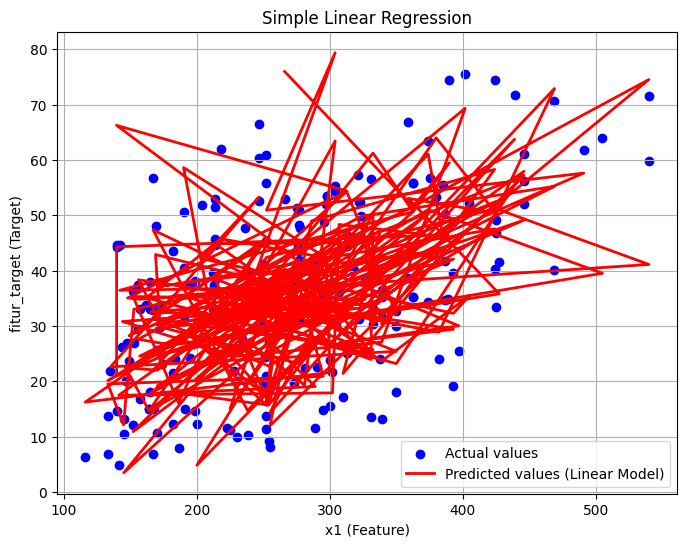

In [117]:
# Check if X_test is a DataFrame or a NumPy array
if isinstance(X_test, pd.DataFrame):
    # If it's a DataFrame, access the column by name
    X_test_1d = X_test['x1'].values  # Extract the 'x1' column as a 1D array for visualization
else:
    # If it's a NumPy array, access the column by index (assuming 'x1' is the first feature)
    X_test_1d = X_test[:, 0]  # Access the first column (index 0)

# Ensure that the predicted and actual values are aligned correctly
print("Shape of X_test_1d:", X_test_1d.shape)
print("Shape of y_test:", y_test.shape)
print("Shape of y_pred_linear:", y_pred_linear.shape)

# Plotting the actual vs. predicted values for the chosen feature
plt.figure(figsize=(8, 6))
plt.scatter(X_test_1d, y_test, color='blue', label='Actual values')  # Scatter plot of actual values
plt.plot(X_test_1d, y_pred_linear, color='red', linewidth=2, label='Predicted values (Linear Model)')  # Line plot of predictions
plt.title('Simple Linear Regression')
plt.xlabel('x1 (Feature)')
plt.ylabel('fitur_target (Target)')
plt.legend()
plt.grid(True)
plt.show()


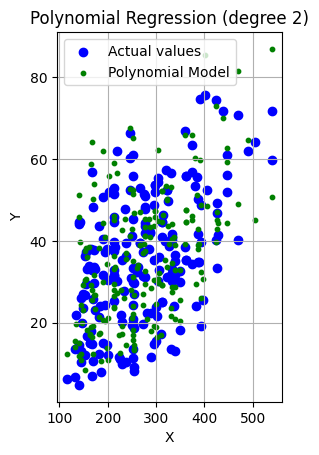

In [119]:
# Plot for polynomial regression
plt.subplot(1, 2, 2)

# Assuming X_test has a single feature, extract it as a 1D array
X_test_1d = X_test[:, 0]  # Or X_test['feature_name'] if X_test is a DataFrame

plt.scatter(X_test_1d, y_test, color='blue', label='Actual values')  # Use X_test_1d
plt.scatter(X_test_1d, y_pred_poly, color='green', s=10, label='Polynomial Model')  # Use X_test_1d
plt.title(f'Polynomial Regression (degree {degree})')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)

In [111]:
# Show the plots
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

In [112]:
print(data.columns)


Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'x14', 'x15', 'target_feature'],
      dtype='object')


In [113]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (824, 13)
y_train shape: (824,)


In [114]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (824, 13)
X_test shape: (206, 13)
